# RPGF posts analysis

This documents is basic analysis of http://rpgforum.cz/forum/ posting habits. RPG forum is the bigest organized community of RPG hobby in Czech Republic.

First part of analysis is analysis of post count over time, in various sections.

Second part of analysis is going to be time series-style analysis of post times.

Third part of analysis will be sentiment analysis to plot moods over time.

In [1]:
#import and setup
%matplotlib inline
import matplotlib
import pandas as pd
matplotlib.style.use('ggplot')
matplotlib.rc('font', family='Arial')

In [2]:
# load data
posts = pd.DataFrame.from_csv('rpgf_posts_with_topforum.csv', index_col=None)
posts
posts['post_time'] = pd.to_datetime(posts.post_time)
posts.head()

thread_title                        forum_name  \
0            Březnový sraz RPG fóra, Praha  Akce, seznamka a družinové sekce   
1               Stars Without Number hraní  Akce, seznamka a družinové sekce   
2  Otevřené hraní RPG - klub Mephit, Praha  Akce, seznamka a družinové sekce   
3               Zarijovy/Rijnovy sraz rpgf  Akce, seznamka a družinové sekce   
4  Otevřené hraní RPG - klub Mephit, Praha  Akce, seznamka a družinové sekce   

                                           post_text           post_time  \
0                                           Spoustu. 2014-03-10 18:50:03   
1  E^2: Bude přímo záznam ze hry na Twitchi a poj... 2014-08-01 07:26:47   
2       Shadows of Esteren zitra. Jeste volne misto. 2014-09-27 11:42:59   
3  Hele ja ted zjistil, ze kamos ma narozeniny a ... 2014-10-01 13:14:31   
4  kdo se nechystá na slezinu, ale našel by si ča... 2014-11-06 10:21:36   

                     top_forum_name  
0  Akce, seznamka a družinové sekce  
1  Akce, seznamka a družinové sekce  
2  Akce, seznamka a družinové sekce  
3  Akce, seznamka a družinové sekce  
4  Akce, seznamka a družinové sekce

## Part 1 - post counts
### Posts by section

In [3]:
posts.groupby('top_forum_name').size().plot(kind = 'bar')

### Posts in various sections in time

In [4]:
p = posts.groupby(['top_forum_name', 'post_time']).size().unstack(0)
p = p.resample('m', how='sum').fillna(0)
p.plot(figsize=[17,10], stacked='True', kind='area')

### Amount of *Pokec* and *Nepokec* posts  in time

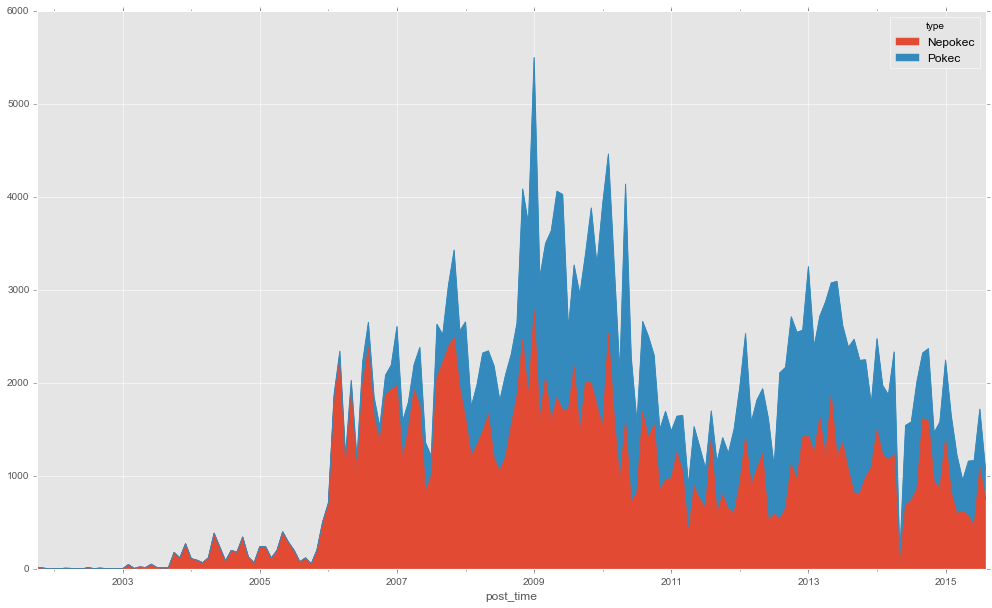

In [5]:
p = posts.copy()
p.loc[p.top_forum_name == 'Rozličný pokec', 'type'] = 'Pokec'
p.loc[p.top_forum_name != 'Rozličný pokec', 'type'] = 'Nepokec'
p = p.groupby(['type', 'post_time']).size().unstack(0)
p = p.resample('m', how='sum').fillna(0)
p.plot(figsize=[17,10], stacked='True', kind='area')

### Amount of *Pokec* and *Nepokec* posts  in time - nonstacked

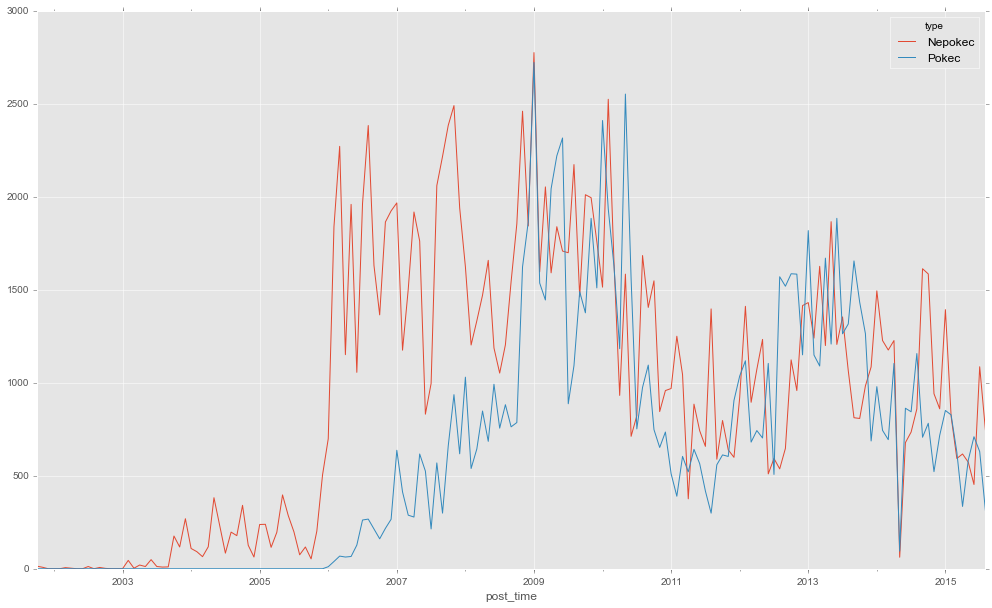

In [6]:
p = posts.copy()
p.loc[p.top_forum_name == 'Rozličný pokec', 'type'] = 'Pokec'
p.loc[p.top_forum_name != 'Rozličný pokec', 'type'] = 'Nepokec'
p = p.groupby(['type', 'post_time']).size().unstack(0)
p = p.resample('m', how='sum').fillna(0)
p.plot(figsize=[17,10])

### Ratio of *Pokec* and *Nepokec* posts in time

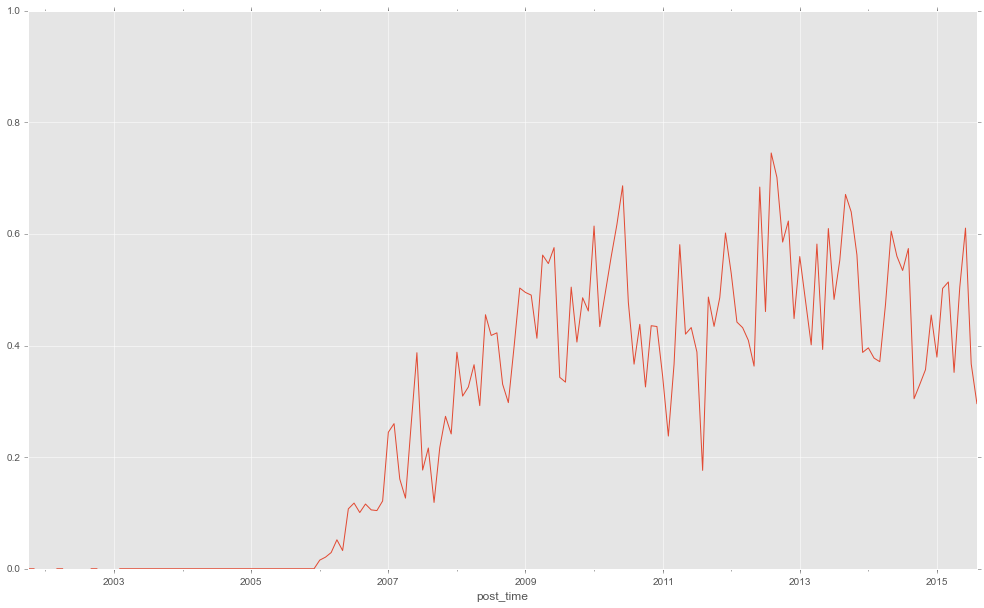

In [7]:
p = posts.copy()
p.loc[p.top_forum_name == 'Rozličný pokec', 'type'] = 'Pokec'
p.loc[p.top_forum_name != 'Rozličný pokec', 'type'] = 'Nepokec'
p = p.groupby(['type', 'post_time']).size().unstack(0)
p = p.resample('m', how='sum').fillna(0)
p_r = p.Pokec / (p.Pokec + p.Nepokec)
p_r.plot(figsize=[17,10], ylim=[0,1])

### Posts by hour of day

In [8]:
# hour of day
p = posts.copy()
p.post_time.dt.hour.value_counts().sort_index().plot(figsize=[13,7], kind = 'bar')

### Posts by day of week

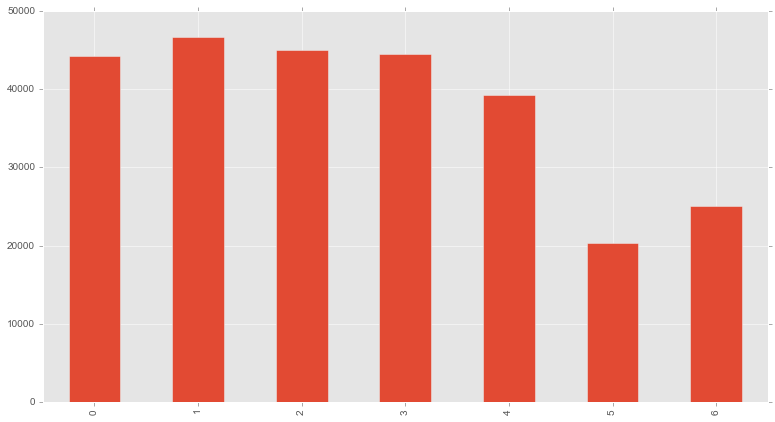

In [9]:
# day of week
p = posts.copy()
p.post_time.dt.weekday.value_counts().sort_index().plot(figsize=[13,7], kind = 'bar')

### Posts by month of year

In [10]:
p = posts.copy()
p.post_time.dt.month.value_counts().sort_index().plot(figsize=[13,7], kind = 'bar')

### Parts 2 and 3 are not done yet